# Lineer Regresyon

## Giriş - Tanım - Teori

Lineer Regresyon, tahmine dayalı modellemede en basit ve en yaygın kullanılan istatistiksel tekniklerden biridir. Gözlemlenen verilere doğrusal bir denklem uydurarak, bir bağımlı değişken y ile bir veya daha fazla bağımsız değişken X arasındaki ilişkiyi modellemeyi amaçlar.

Lineer regresyonun en basit şekli, yalnızca bir bağımsız değişkenin olduğu basit lineer regresyondur. Bu durumda bir çizginin denklemi:

$\ y = a \cdot x + b $

Burada:

- `y` tahmin etmeye çalıştığımız bağımlı değişkendir.
- `x` bağımsız değişkendir.
- `b`, `y`-kesme noktasıdır, yani `x` 0 olduğunda `y`'nin değeridir.
- `a`, `x`'teki bir birimlik değişiklik için `y`'deki değişikliği temsil eden doğrunun eğimidir.

## Numpy ile Veri Oluşturma

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from ipywidgets import interactive

np.random.seed(42)

In [ ]:
x = 2 * np.random.rand(100, 1)
y = 3 * x + 4 + np.random.rand(100, 1) # 3x + 4

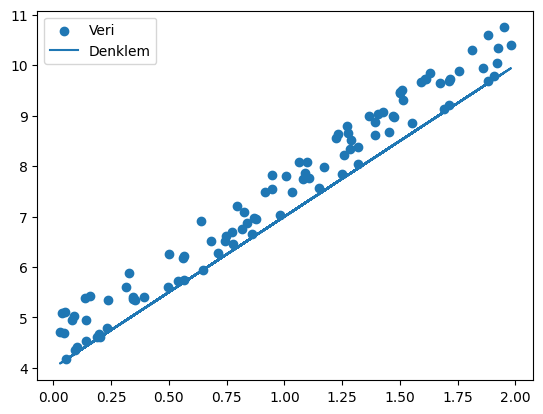

In [ ]:
plt.scatter(x, y, label = "Veri")
plt.plot(x, 3 * x + 4, label = "Denklem")
plt.legend()
plt.show()

In [ ]:
def plot_func(a, b):
    plt.scatter(x, y, label = "Veri")
    plt.plot(x, a * x + b, label = "Denklem", c = "red")
    plt.xlabel("x", fontsize = 16)
    plt.ylabel("y", fontsize = 16)
    plt.title(f"y = {a:.2f} * x + {b:.2f}")
    plt.legend()
    plt.show()

In [ ]:
interactive(plot_func, a=(-5, 5, 0.1), b=(-5, 5, 0.1))

interactive(children=(FloatSlider(value=0.0, description='a', max=5.0, min=-5.0), FloatSlider(value=0.0, descr…

## Sklearn Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [ ]:
model.fit(x, y)

LinearRegression()

In [ ]:
model.coef_, model.intercept_

(array([[3.10180052]]), array([4.41604738]))

In [ ]:
model.predict([[5]])

array([[19.92505]])

In [ ]:
# Modellenen denklem a * x + b
# a = model.coef_
# b = model.intercept_
x_input = 5
model.coef_ * x_input + model.intercept_

array([[19.92505]])

In [ ]:
# np.linalg.lstsq() --> sklearn kaynak kodunda bu kullanılıyor.

## Ev Fiyatları Verisetinin Yüklenmesi ve Linear Regression

In [ ]:
from sklearn.datasets import fetch_openml
housing = fetch_openml(name = "house_prices", as_frame=True)
housing

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


{'data':         Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
 0        1          60       RL         65.0     8450   Pave  None      Reg   
 1        2          20       RL         80.0     9600   Pave  None      Reg   
 2        3          60       RL         68.0    11250   Pave  None      IR1   
 3        4          70       RL         60.0     9550   Pave  None      IR1   
 4        5          60       RL         84.0    14260   Pave  None      IR1   
 ...    ...         ...      ...          ...      ...    ...   ...      ...   
 1455  1456          60       RL         62.0     7917   Pave  None      Reg   
 1456  1457          20       RL         85.0    13175   Pave  None      Reg   
 1457  1458          70       RL         66.0     9042   Pave  None      Reg   
 1458  1459          20       RL         68.0     9717   Pave  None      Reg   
 1459  1460          20       RL         75.0     9937   Pave  None      Reg   
 
      LandContour Utilities  .

In [ ]:
X = housing.data
y = housing.target

In [ ]:
X.drop(["Id"], axis=1, inplace=True)
X

<ipython-input-139-31de65d08677>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.drop(["Id"], axis=1, inplace=True)


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,Inside,...,0,0,None,None,None,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,FR2,...,0,0,None,None,None,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,Inside,...,0,0,None,None,None,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,Corner,...,0,0,None,None,None,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,FR2,...,0,0,None,None,None,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,None,Reg,Lvl,AllPub,Inside,...,0,0,None,None,None,0,8,2007,WD,Normal
1456,20,RL,85.0,13175,Pave,None,Reg,Lvl,AllPub,Inside,...,0,0,None,MnPrv,None,0,2,2010,WD,Normal
1457,70,RL,66.0,9042,Pave,None,Reg,Lvl,AllPub,Inside,...,0,0,None,GdPrv,Shed,2500,5,2010,WD,Normal
1458,20,RL,68.0,9717,Pave,None,Reg,Lvl,AllPub,Inside,...,0,0,None,None,None,0,4,2010,WD,Normal


In [ ]:
X.iloc[0]

MSSubClass           60
MSZoning             RL
LotFrontage        65.0
LotArea            8450
Street             Pave
                  ...  
MiscVal               0
MoSold                2
YrSold             2008
SaleType             WD
SaleCondition    Normal
Name: 0, Length: 79, dtype: object

In [ ]:
y[0]

208500

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
"""
test_size, verisetinin boyutuna göre her pipeline veya
problemde değişiklik gösterir.
1M satır veri olursa, test_size = 0.01 olabilir.
"""

X_train, X_test, y_train, y_test = train_test_split(
                                    X, y,
                                    test_size=0.2,
                                    random_state=42,
                                    shuffle=True)

In [ ]:
X_train

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
254,20,RL,70.0,8400,Pave,None,Reg,Lvl,AllPub,Inside,...,0,0,None,None,None,0,6,2010,WD,Normal
1066,60,RL,59.0,7837,Pave,None,IR1,Lvl,AllPub,Inside,...,0,0,None,None,None,0,5,2009,WD,Normal
638,30,RL,67.0,8777,Pave,None,Reg,Lvl,AllPub,Inside,...,0,0,None,MnPrv,None,0,5,2008,WD,Normal
799,50,RL,60.0,7200,Pave,None,Reg,Lvl,AllPub,Corner,...,0,0,None,MnPrv,None,0,6,2007,WD,Normal
380,50,RL,50.0,5000,Pave,Pave,Reg,Lvl,AllPub,Inside,...,0,0,None,None,None,0,5,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,20,RL,78.0,9317,Pave,None,IR1,Lvl,AllPub,Inside,...,0,0,None,None,None,0,3,2007,WD,Normal
1130,50,RL,65.0,7804,Pave,None,Reg,Lvl,AllPub,Inside,...,0,0,None,MnPrv,None,0,12,2009,WD,Normal
1294,20,RL,60.0,8172,Pave,None,Reg,Lvl,AllPub,Inside,...,0,0,None,None,None,0,4,2006,WD,Normal
860,50,RL,55.0,7642,Pave,None,Reg,Lvl,AllPub,Corner,...,0,0,None,GdPrv,None,0,6,2007,WD,Normal


In [ ]:
y_train

254     145000
1066    178000
638      85000
799     175000
380     127000
         ...  
1095    176432
1130    135000
1294    115000
860     189950
1126    174000
Name: SalePrice, Length: 1168, dtype: int64

In [ ]:
X_test

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
892,20,RL,70.0,8414,Pave,None,Reg,Lvl,AllPub,Inside,...,0,0,None,MnPrv,None,0,2,2006,WD,Normal
1105,60,RL,98.0,12256,Pave,None,IR1,Lvl,AllPub,Corner,...,0,0,None,None,None,0,4,2010,WD,Normal
413,30,RM,56.0,8960,Pave,Grvl,Reg,Lvl,AllPub,Inside,...,0,0,None,None,None,0,3,2010,WD,Normal
522,50,RM,50.0,5000,Pave,None,Reg,Lvl,AllPub,Corner,...,0,0,None,None,None,0,10,2006,WD,Normal
1036,20,RL,89.0,12898,Pave,None,IR1,HLS,AllPub,Inside,...,0,0,None,None,None,0,9,2009,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
479,30,RM,50.0,5925,Pave,None,Reg,Bnk,AllPub,Inside,...,0,0,None,MnPrv,None,0,3,2007,WD,Alloca
1361,20,RL,124.0,16158,Pave,None,IR1,Low,AllPub,Inside,...,0,0,None,None,None,0,6,2009,WD,Normal
802,60,RL,63.0,8199,Pave,None,Reg,Lvl,AllPub,Inside,...,0,0,None,None,None,0,10,2008,WD,Normal
651,70,RL,60.0,9084,Pave,None,Reg,Lvl,AllPub,Inside,...,0,0,None,MnPrv,None,0,10,2009,WD,Normal


## Veriseti Önişleme

In [ ]:
model = LinearRegression()

In [ ]:
model.fit(X_train, y_train)

ValueError: ignored

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1168 entries, 254 to 1126
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1168 non-null   int64  
 1   MSZoning       1168 non-null   object 
 2   LotFrontage    951 non-null    float64
 3   LotArea        1168 non-null   int64  
 4   Street         1168 non-null   object 
 5   Alley          74 non-null     object 
 6   LotShape       1168 non-null   object 
 7   LandContour    1168 non-null   object 
 8   Utilities      1168 non-null   object 
 9   LotConfig      1168 non-null   object 
 10  LandSlope      1168 non-null   object 
 11  Neighborhood   1168 non-null   object 
 12  Condition1     1168 non-null   object 
 13  Condition2     1168 non-null   object 
 14  BldgType       1168 non-null   object 
 15  HouseStyle     1168 non-null   object 
 16  OverallQual    1168 non-null   int64  
 17  OverallCond    1168 non-null   int64  
 18  YearBu

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.impute import SimpleImputer

In [ ]:
categorical_columns = list(X_train.select_dtypes(include = ["object"]).columns)
numerical_columns = list(X_train.select_dtypes(include = ["int64", "float64"]).columns)

In [ ]:
X_train[["BsmtFinType1"]].mode()

,BsmtFinType1
0,Unf


In [ ]:
len(categorical_columns + numerical_columns)

79

In [ ]:
# Numerical
numerical_imputer = SimpleImputer(strategy = "median")

# Categorical
encoder = OrdinalEncoder(handle_unknown="use_encoded_value",
                         unknown_value=-1)
categorical_imputer = SimpleImputer(strategy = "most_frequent")

In [ ]:
X_train[numerical_columns] = numerical_imputer.fit_transform(X_train[numerical_columns])

In [ ]:
# Test datasında kesinlikle fit_transform yapmıyoruz!!!
X_test[numerical_columns] = numerical_imputer.transform(X_test[numerical_columns])

In [ ]:
X_train

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
254,20.0,RL,70.0,8400.0,Pave,None,Reg,Lvl,AllPub,Inside,...,0.0,0.0,None,None,None,0.0,6.0,2010.0,WD,Normal
1066,60.0,RL,59.0,7837.0,Pave,None,IR1,Lvl,AllPub,Inside,...,0.0,0.0,None,None,None,0.0,5.0,2009.0,WD,Normal
638,30.0,RL,67.0,8777.0,Pave,None,Reg,Lvl,AllPub,Inside,...,0.0,0.0,None,MnPrv,None,0.0,5.0,2008.0,WD,Normal
799,50.0,RL,60.0,7200.0,Pave,None,Reg,Lvl,AllPub,Corner,...,0.0,0.0,None,MnPrv,None,0.0,6.0,2007.0,WD,Normal
380,50.0,RL,50.0,5000.0,Pave,Pave,Reg,Lvl,AllPub,Inside,...,0.0,0.0,None,None,None,0.0,5.0,2010.0,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,20.0,RL,78.0,9317.0,Pave,None,IR1,Lvl,AllPub,Inside,...,0.0,0.0,None,None,None,0.0,3.0,2007.0,WD,Normal
1130,50.0,RL,65.0,7804.0,Pave,None,Reg,Lvl,AllPub,Inside,...,0.0,0.0,None,MnPrv,None,0.0,12.0,2009.0,WD,Normal
1294,20.0,RL,60.0,8172.0,Pave,None,Reg,Lvl,AllPub,Inside,...,0.0,0.0,None,None,None,0.0,4.0,2006.0,WD,Normal
860,50.0,RL,55.0,7642.0,Pave,None,Reg,Lvl,AllPub,Corner,...,0.0,0.0,None,GdPrv,None,0.0,6.0,2007.0,WD,Normal


In [ ]:
X_train[categorical_columns] = categorical_imputer.fit_transform(X_train[categorical_columns])
X_test[categorical_columns] = categorical_imputer.transform(X_test[categorical_columns])

In [ ]:
X_train[categorical_columns] = encoder.fit_transform(X_train[categorical_columns])

In [ ]:
# Train datasında A B C değerleri var.
# Test datasında D geliyor.

In [ ]:
X_test[categorical_columns] = encoder.transform(X_test[categorical_columns])

In [ ]:
X_train[categorical_columns]

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
254,3.0,1.0,2.0,3.0,3.0,0.0,4.0,0.0,12.0,2.0,...,1.0,1.0,4.0,4.0,2.0,3.0,4.0,4.0,8.0,4.0
1066,3.0,1.0,2.0,0.0,3.0,0.0,4.0,0.0,8.0,2.0,...,1.0,1.0,4.0,4.0,2.0,3.0,4.0,4.0,8.0,4.0
638,3.0,1.0,2.0,3.0,3.0,0.0,4.0,0.0,7.0,1.0,...,6.0,3.0,5.0,5.0,1.0,3.0,2.0,4.0,8.0,4.0
799,3.0,1.0,2.0,3.0,3.0,0.0,0.0,0.0,18.0,1.0,...,5.0,2.0,4.0,4.0,2.0,3.0,2.0,4.0,8.0,4.0
380,3.0,1.0,1.0,3.0,3.0,0.0,4.0,0.0,18.0,2.0,...,5.0,2.0,4.0,4.0,2.0,3.0,4.0,4.0,8.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,3.0,1.0,2.0,0.0,3.0,0.0,4.0,0.0,5.0,2.0,...,1.0,1.0,4.0,4.0,2.0,3.0,4.0,4.0,8.0,4.0
1130,3.0,1.0,2.0,3.0,3.0,0.0,4.0,0.0,18.0,2.0,...,5.0,2.0,4.0,4.0,2.0,3.0,2.0,4.0,8.0,4.0
1294,3.0,1.0,2.0,3.0,3.0,0.0,4.0,0.0,7.0,2.0,...,5.0,2.0,4.0,4.0,0.0,3.0,4.0,4.0,8.0,4.0
860,3.0,1.0,2.0,3.0,3.0,0.0,0.0,0.0,6.0,2.0,...,5.0,2.0,4.0,4.0,2.0,3.0,0.0,4.0,8.0,4.0


In [ ]:
X_train

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
254,20.0,3.0,70.0,8400.0,1.0,2.0,3.0,3.0,0.0,4.0,...,0.0,0.0,3.0,4.0,4.0,0.0,6.0,2010.0,8.0,4.0
1066,60.0,3.0,59.0,7837.0,1.0,2.0,0.0,3.0,0.0,4.0,...,0.0,0.0,3.0,4.0,4.0,0.0,5.0,2009.0,8.0,4.0
638,30.0,3.0,67.0,8777.0,1.0,2.0,3.0,3.0,0.0,4.0,...,0.0,0.0,3.0,2.0,4.0,0.0,5.0,2008.0,8.0,4.0
799,50.0,3.0,60.0,7200.0,1.0,2.0,3.0,3.0,0.0,0.0,...,0.0,0.0,3.0,2.0,4.0,0.0,6.0,2007.0,8.0,4.0
380,50.0,3.0,50.0,5000.0,1.0,1.0,3.0,3.0,0.0,4.0,...,0.0,0.0,3.0,4.0,4.0,0.0,5.0,2010.0,8.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,20.0,3.0,78.0,9317.0,1.0,2.0,0.0,3.0,0.0,4.0,...,0.0,0.0,3.0,4.0,4.0,0.0,3.0,2007.0,8.0,4.0
1130,50.0,3.0,65.0,7804.0,1.0,2.0,3.0,3.0,0.0,4.0,...,0.0,0.0,3.0,2.0,4.0,0.0,12.0,2009.0,8.0,4.0
1294,20.0,3.0,60.0,8172.0,1.0,2.0,3.0,3.0,0.0,4.0,...,0.0,0.0,3.0,4.0,4.0,0.0,4.0,2006.0,8.0,4.0
860,50.0,3.0,55.0,7642.0,1.0,2.0,3.0,3.0,0.0,0.0,...,0.0,0.0,3.0,0.0,4.0,0.0,6.0,2007.0,8.0,4.0


## Modelin Kurulması

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
predictions = model.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
mean_squared_error(y_test, predictions, squared=False) # RootMSE

34619.31564197691

In [ ]:
y_test.values[0]

154500

In [ ]:
predictions[0]

147374.11112521682